### Import necessary libraries 

In [8]:
import pandas as pd
import os

### Task 1 : Merging 12 months of data in one file 

In [9]:
all_months_data = pd.DataFrame()

In [10]:
file_list = os.listdir('./Sales_Data')

In [11]:
print(file_list)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [12]:
for file in file_list:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

In [13]:
all_months_data.to_csv('All_Sales.csv', index = False)

In [14]:
all_months_data.sort_values(by = 'Order Date')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
6344,147268,Wired Headphones,1,11.99,01/01/19 03:07,"9 Lake St, New York City, NY 10001"
7154,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"760 Church St, San Francisco, CA 94016"
8507,149343,Apple Airpods Headphones,1,150,01/01/19 04:56,"735 5th St, New York City, NY 10001"
9161,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"75 Jackson St, Dallas, TX 75001"
8514,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


 ### Read in updated dataframe

In [15]:
all_data = pd.read_csv('All_Sales.csv')

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Task 2 : Clean up data !

### I. Drop NAN

In [17]:
nan_df = all_data[all_data.isna().any(axis = 1)]

In [18]:
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_data = all_data.dropna(how = 'all')

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [21]:
all_data.shape

(186305, 6)

### II. Find 'Or' and delete it

In [22]:
temp = all_data[all_data['Order Date'].str[0:2] == 'Or']

In [23]:
temp.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [24]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [26]:
all_data.shape

(185950, 6)

### Task3.1 : Augment data with additional columns - Month & Amount

In [27]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [28]:
all_data['Month'] = all_data['Month'].astype('int32')

In [29]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [30]:
print(all_data[['Quantity Ordered', 'Price Each']].dtypes)

Quantity Ordered    object
Price Each          object
dtype: object


In [31]:
all_data['Amount'] = all_data['Quantity Ordered'].astype('int32') * all_data['Price Each'].astype('float32')

In [62]:
all_data['Amount'] = all_data['Amount'].round(4)
all_data.sort_values(by = 'Month')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Split Address,City
69397,142996,AAA Batteries (4-pack),1,2.99,01/01/19 21:01,"402 Chestnut St, Boston, MA 02215",1,2.99,"[402 Chestnut St, Boston, MA 02215]",Boston
70773,144300,Apple Airpods Headphones,1,150,01/11/19 14:22,"532 River St, San Francisco, CA 94016",1,150.00,"[532 River St, San Francisco, CA 94016]",San Francisco
70772,144299,27in 4K Gaming Monitor,1,389.99,01/31/19 19:57,"942 North St, San Francisco, CA 94016",1,389.99,"[942 North St, San Francisco, CA 94016]",San Francisco
70771,144298,Lightning Charging Cable,1,14.95,01/13/19 12:00,"709 North St, Los Angeles, CA 90001",1,14.95,"[709 North St, Los Angeles, CA 90001]",Los Angeles
70770,144297,Flatscreen TV,1,300,01/21/19 14:37,"437 Madison St, Atlanta, GA 30301",1,300.00,"[437 Madison St, Atlanta, GA 30301]",Atlanta
...,...,...,...,...,...,...,...,...,...,...
47162,311693,27in FHD Monitor,1,149.99,12/06/19 18:05,"594 9th St, Dallas, TX 75001",12,149.99,"[594 9th St, Dallas, TX 75001]",Dallas
47163,311694,AAA Batteries (4-pack),1,2.99,12/19/19 07:35,"905 11th St, Atlanta, GA 30301",12,2.99,"[905 11th St, Atlanta, GA 30301]",Atlanta
47164,311695,Wired Headphones,1,11.99,12/21/19 21:06,"107 Lakeview St, San Francisco, CA 94016",12,11.99,"[107 Lakeview St, San Francisco, CA 94016]",San Francisco
47142,311673,USB-C Charging Cable,1,11.95,12/26/19 22:24,"169 Forest St, San Francisco, CA 94016",12,11.95,"[169 Forest St, San Francisco, CA 94016]",San Francisco


### Task3.2 : Augment data with additional columns - City & State

In [93]:
all_data.drop(['City', 'Split Address'], axis = 1) 

def get_city(address):
    return address.split(',')[1]  

In [92]:
def get_state(address):
    return address.split(',')[2].split(' ')[1]

In [102]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x : get_city(x)+ ' ('+ get_state(x)+')')

In [103]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Split Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"[917 1st St, Dallas, TX 75001]",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"[682 Chestnut St, Boston, MA 02215]",Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"[669 Spruce St, Los Angeles, CA 90001]",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"[669 Spruce St, Los Angeles, CA 90001]",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"[333 8th St, Los Angeles, CA 90001]",Los Angeles (CA)


## Question 1 : What was the best month for sales ? How much was earned that month

In [37]:
results = all_data.groupby('Month').sum('Amount') 

In [38]:
results.head()

,Amount
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75


Text(0.5, 0, 'Month number')

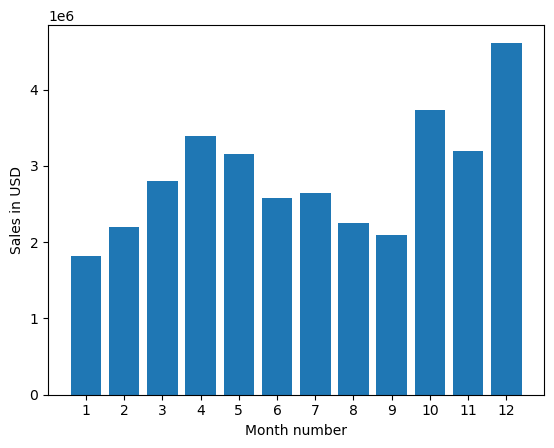

In [39]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,results['Amount'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')

## Question 2 : What city has the highest number of sales ?

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,Split Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"[917 1st St, Dallas, TX 75001]",Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"[682 Chestnut St, Boston, MA 02215]",Boston
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"[669 Spruce St, Los Angeles, CA 90001]",Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"[669 Spruce St, Los Angeles, CA 90001]",Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"[333 8th St, Los Angeles, CA 90001]",Los Angeles


In [112]:
result2 = all_data.groupby('City').sum('Amount')

In [111]:

result2.reset_index()
result2.sort_values('Amount')

,Month,Amount
City,,
Portland (ME),17144,449758.27
Austin (TX),69829,1819581.75
Portland (OR),70621,1870732.34
Seattle (WA),104941,2747755.48
Dallas (TX),104620,2767975.40
Atlanta (GA),104794,2795498.58
Boston (MA),141112,3661642.01
New York City (NY),175741,4664317.43
Los Angeles (CA),208325,5452570.80


Text(0.5, 0, 'Cities')

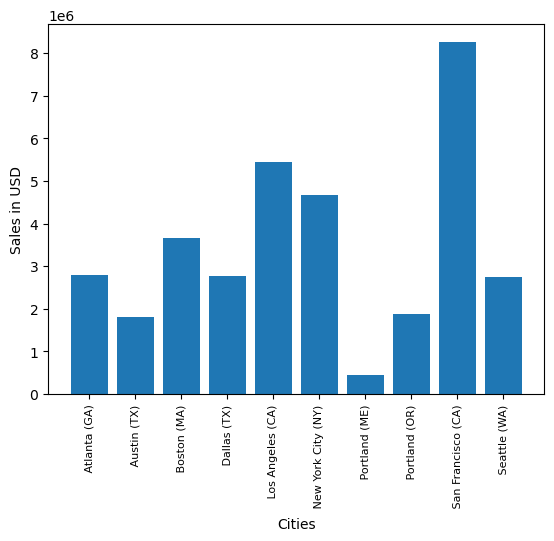

In [114]:
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities, result2['Amount'])
plt.xticks(all_data['City'].unique(),rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Cities')

## Question 3 : What time should we display advertisements to maximize the likelihood of customer's buying product?

In [117]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [118]:
all_data['Hour'] = all_data['Order Date'].dt.hour

In [119]:
hours = [hour for hour, df in all_data.groupby('Hour')]

Text(0, 0.5, 'Sale Count')

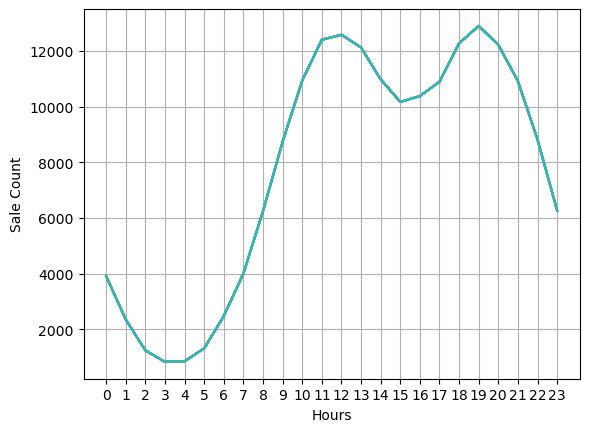

In [127]:
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sale Count')

# Recommendation - Between 11 am & 12 pm  AND  between 6 pm and 7 pm (The chart could also be broken at a city level)

## Question 4 : What products are most often sold together?

In [186]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

In [187]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

C:\Users\manan\AppData\Local\Temp\ipykernel_17848\1806391791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


In [188]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [189]:
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [191]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


## Question 5 : What product sold the most ? Why do you think it sold the most?

In [228]:
product_group = all_data[['Quantity Ordered', 'Product']]
product_group['Quantity Ordered'] = pd.to_numeric(product_group['Quantity Ordered'])
product_group = product_group.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

C:\Users\manan\AppData\Local\Temp\ipykernel_17848\2072530054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_group['Quantity Ordered'] = pd.to_numeric(product_group['Quantity Ordered'])


Text(0, 0.5, 'Quantity Ordered')

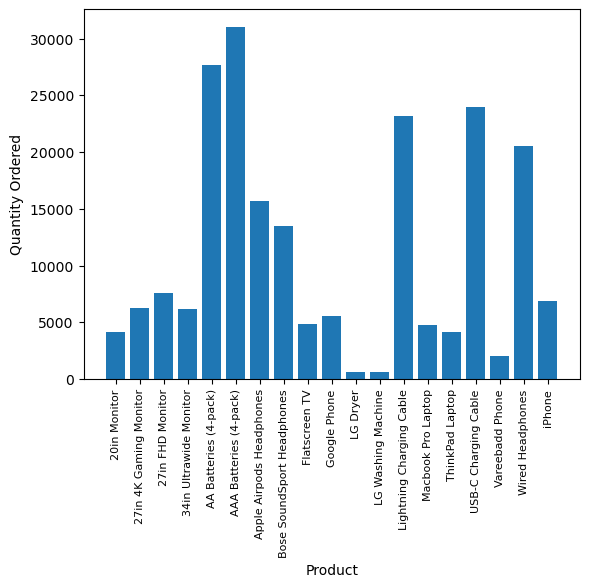

In [233]:
products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

In [236]:
prices = all_data.groupby('Product').mean('Price Each')

C:\Users\manan\AppData\Local\Temp\ipykernel_17848\1444409394.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(products,rotation = 'vertical', size = 6)


Text(0, 0.5, 'Prices')

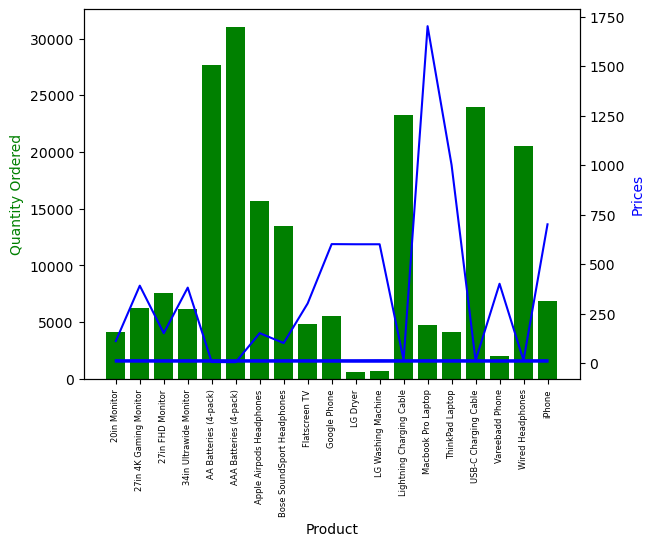

In [244]:
fig,ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(products, quantity_ordered, color = 'g')
ax.set_xticklabels(products,rotation = 'vertical', size = 6)
ax.set_xlabel('Product')
ax.set_ylabel('Quantity Ordered', color = 'g')
ax2.plot(products, prices, color = 'b')
ax2.set_ylabel('Prices', color = 'b')


